In [1]:
from array import array
import math
import numpy as np

In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x

par = []
par.append(1.80)
par.append(-4.05)
par.append(0.40)
par.append(1.0000)
par = np.array(par)

In [3]:
m = 3 #Set the order of the polynomial
n = 15 #Set the number of data points
walk = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
walk = np.array(walk)
sigma = [0.0 for i in range(n)]
sigma = np.array(sigma)

In [4]:
x = []
y = []

In [5]:
for i in range(0,n):
    x.append(-4.0+8.0*i/n)
    y.append(generator_function(x[i],par)+walk[i])
x = np.array(x)
y = np.array(y)

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print (a)
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

#print (a)
#print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

[[ 1.50000000e+01 -4.00000000e+00  8.07111111e+01 -6.40000000e+01]
 [-4.00000000e+00  8.07111111e+01 -6.40000000e+01  7.90715101e+02]
 [ 8.07111111e+01 -6.40000000e+01  7.90715101e+02 -1.02400000e+03]
 [-6.40000000e+01  7.90715101e+02 -1.02400000e+03  9.32004806e+03]]
[[  11.48444444]
 [ 435.83510123]
 [-310.06062617]
 [5672.38257075]]
Diagonal Check:
[[ 1.00000000e+00 -5.55111512e-17 -3.46944695e-17  0.00000000e+00]
 [ 5.39654741e-17  1.00000000e+00 -9.23472171e-17 -1.07313083e-16]
 [-6.60929644e-16  8.72915208e-17  1.00000000e+00 -2.47859164e-17]
 [ 2.84860355e-15  1.53519593e-15 -9.03107771e-16  1.00000000e+00]]
Coefficients:
[[ 1.82678571]
 [-4.20430571]
 [ 0.40511322]
 [ 1.02237035]]


In [8]:
yfit = 0
chi2 = 0
for j in range(0,n):
    for k in range(0,m+1):
        yfit = yfit + coeff[k]*math.pow(x[j],k)
    print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
    chi2 = chi2 + math.pow((yfit-y[j]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m-1)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

i = 0  y = -41.600000  yfit = -40.305882
i = 1  y = -19.014519  yfit = -21.323342
i = 2  y = -9.117926  yfit = -8.159135
i = 3  y = 1.000000  yfit = 0.117324
i = 4  y = 4.249481  yfit = 4.436618
i = 5  y = 3.540741  yfit = 5.729332
i = 6  y = 6.784000  yfit = 4.926049
i = 7  y = 1.889481  yfit = 2.957355
i = 8  y = 1.767407  yfit = 0.753833
i = 9  y = -0.672000  yfit = -0.753933
i = 10  y = -2.518519  yfit = -0.635358
i = 11  y = 4.138074  yfit = 2.040143
i = 12  y = 7.208000  yfit = 8.203152
i = 13  y = 19.601481  yfit = 18.784255
i = 14  y = 34.228741  yfit = 34.714035
chi2/dof = 28.996445 / 11.000000


In [9]:
for k in range(0,m+1):
    print("k = %d, err = %f" % (k,math.pow(ainv[k][k]*chi2perdof,0.5)))

k = 0, err = 0.638326
k = 1, err = 0.455858
k = 2, err = 0.095799
k = 3, err = 0.044716


[ 1.82678571 -4.20430571  0.40511323  1.02237035] [[ 0.40746015  0.03345514 -0.04539429 -0.00502785]
 [ 0.03345514  0.20780616 -0.01064396 -0.01857005]
 [-0.04539429 -0.01064396  0.00917737  0.00159964]
 [-0.00502785 -0.01857005  0.00159964  0.00199955]]
Coefficients (from curve_fit)
[ 1.82678571 -4.20430571  0.40511323  1.02237035]
Covariance Matrix (from curve_fit)
[[ 0.40746015  0.03345514 -0.04539429 -0.00502785]
 [ 0.03345514  0.20780616 -0.01064396 -0.01857005]
 [-0.04539429 -0.01064396  0.00917737  0.00159964]
 [-0.00502785 -0.01857005  0.00159964  0.00199955]]
Chi^2 / dof = INF / 11
Fit Parameter 0: 1.827E+00 +/- 6.383E-01
0 1 1.150E-01
0 2 -7.423E-01
0 3 -1.761E-01
Fit Parameter 1: -4.204E+00 +/- 4.559E-01
1 2 -2.437E-01
1 3 -9.110E-01
Fit Parameter 2: 4.051E-01 +/- 9.580E-02
2 3 3.734E-01
Fit Parameter 3: 1.022E+00 +/- 4.472E-02


/tmp/ipykernel_50173/2487955924.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma[i]*sigma[i])


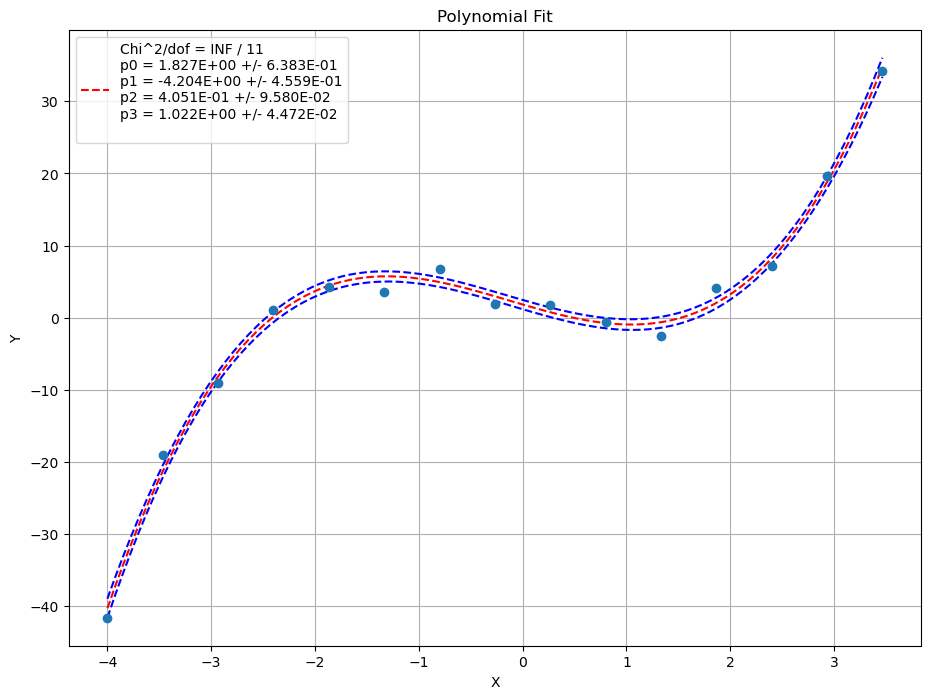

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma[i]*sigma[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(n-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()